In [1]:
import util
dataset = util.loaddata()
len(dataset)

6697

In [2]:
dataset[100]

Race(race_id='2019102708040905', num=14, tan_odds=[1.5, 42.6, 36.0, 105.9, 14.3, 66.1, 16.4, 57.0, 88.6, 32.9, 77.1, 6.9, 7.3, 402.4], ren_odds=659.2, order=[11, 0, 3, 6, 8, 9, 4, 2, 10, 12, 5, 7, 13, 1])

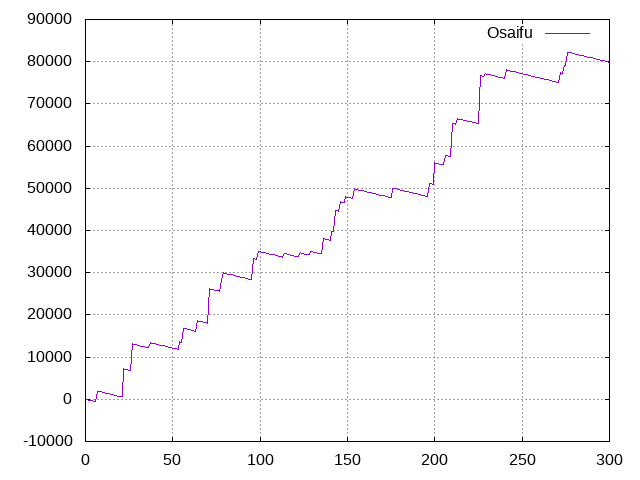

In [40]:
import numpy
from collections import Counter
from gnuplot import Figure, Gnuplot
import random


wallet = 0
wallet_history = [0]


for race in random.sample(dataset, 300):
    # print(race)
    a = [(odd, i) for i, odd in enumerate(race.tan_odds)]
    a.sort()
    difs = []
    for i in range(race.num):
        if i == 0:
            difs.append(a[1][0] - a[0][0])
        elif i == race.num - 1:
            difs.append(a[i][0] - a[i-1][0])
        else:
            difs.append((a[i+1][0] - a[i-1][0]) / 2)
    
    sigmas = {i: 10 * (max(1, x) ** -0.3) for (_, i), x in zip(a, difs)}
    
    params = {}
    for i in range(race.num):
        mu = race.tan_odds[i] ** 0.8
        sigma = sigmas[i]
        params[i] = (mu, sigma)
    # print(params)

    cx = Counter()

    for _ in range(1000):
        result = []
        for i in range(race.num):
            x = numpy.random.normal(*params[i])
            result.append((x, i))
        result.sort()
        pred_order = [i for _, i in result]
        cx[tuple(pred_order[:3])] += 1

    # print(set(cx.most_common(1)[0][0]))
    if set(cx.most_common(1)[0][0]) == set(race.order[:3]):
        wallet += 100 * race.ren_odds
    wallet -= 100
    wallet_history.append(wallet)


with Gnuplot() as g:
    g.set('terminal', 'png')
    g.set('output', '"/tmp/out.png"')
    g.set('grid')
    g.var('$dat', wallet_history)
    fig = Figure('$dat', _with='lines', title='Osaifu')
    g.plot(fig)
    
    
from IPython.display import Image
Image("/tmp/out.png")